In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy.sparse.linalg

In [2]:
imgs = utils.load_images('dataset')

height, width = imgs[0].shape

print(f"O dataset possui {len(imgs)} imagens com o tamanho de {height}x{width} pixels.")

O dataset possui 97 imagens com o tamanho de 64x64 pixels.


In [3]:
imgs_row = np.array([img.reshape(-1) for img in imgs])
imgs_row[0]

array([  3,   3,   3, ...,  93, 109, 130], shape=(4096,), dtype=uint8)

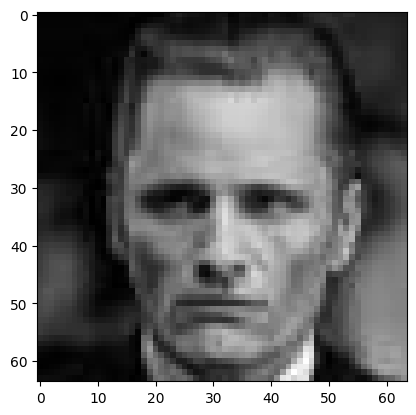

In [4]:
plt.imshow(imgs_row[0].reshape(height, width), cmap='gray')
plt.show()

In [16]:
u = np.mean(imgs_row, axis=0)
print(u.reshape(-1,1))

[[111.05154639]
 [112.35051546]
 [112.65979381]
 ...
 [ 93.06185567]
 [ 93.64948454]
 [ 94.98969072]]


In [20]:
X = imgs_row - u
print(X[:5])

[[-1.08051546e+02 -1.09350515e+02 -1.09659794e+02 ... -6.18556701e-02
   1.53505155e+01  3.50103093e+01]
 [ 6.39484536e+01  6.36494845e+01  6.93402062e+01 ...  1.08938144e+02
   1.09350515e+02  1.04010309e+02]
 [-2.80515464e+01 -3.63505155e+01 -3.86597938e+01 ... -4.00618557e+01
  -4.06494845e+01 -4.19896907e+01]
 [-1.01051546e+02 -1.02350515e+02 -1.01659794e+02 ... -7.06185567e+00
  -6.76494845e+01 -8.99896907e+01]
 [-9.40515464e+01 -9.53505155e+01 -9.46597938e+01 ...  2.89381443e+01
   4.35051546e+00 -7.99896907e+01]]


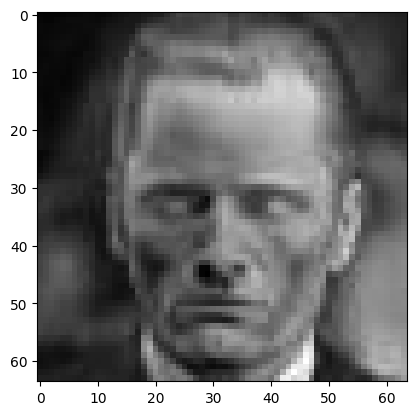

In [21]:
plt.imshow(X[0].reshape(height, width), cmap = 'gray')

In [22]:
# Calcular a matriz de covariancia
def get_cov_matrix(X):

    cov_matrix = np.dot(X.T, X)

    cov_matrix = (1/(X.shape[0]-1)) * cov_matrix

    return cov_matrix

cov_matrix = get_cov_matrix(X)

print(f"Matrix de covariância (shape): {cov_matrix.shape}")
print(f"Matriz de covariância: \n{cov_matrix}")

Matrix de covariância (shape): (4096, 4096)
Matriz de covariância: 
[[6766.84106529 6646.54424399 6525.66355241 ... 1576.06969502
  1927.14325601 2221.87553694]
 [6646.54424399 6620.89669244 6512.47465636 ... 1517.82184278
  1861.29080756 2148.99323454]
 [6525.66355241 6512.47465636 6606.74763746 ... 1659.84417955
  2010.23367698 2284.53812285]
 ...
 [1576.06969502 1517.82184278 1659.84417955 ... 6062.30863402
  6065.58440722 5710.542311  ]
 [1927.14325601 1861.29080756 2010.23367698 ... 6065.58440722
  6353.95919244 6085.7463488 ]
 [2221.87553694 2148.99323454 2284.53812285 ... 5710.542311
  6085.7463488  6146.17697595]]


In [23]:
# Calcular os autovalores e autovetores
eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(cov_matrix, k=55)

print(f"Eigenvalues: \n{eigenvalues}")
print(f"Eigenvectors (shape): {eigenvectors.shape}")

Eigenvalues: 
[  26050.16201746   27593.33322828   28240.52733951   29106.12516446
   29959.40129769   30469.48125389   31373.0713584    33728.85691316
   34091.62111347   35700.10161758   36557.23672707   37961.44447314
   39219.01214003   40369.31120912   40778.09101451   41895.45209115
   43162.61667861   43473.81876682   46383.51253113   48866.4762795
   51477.72403973   52338.48280687   53832.97361255   58315.94051607
   61699.26004335   64743.13381855   65172.04629901   67639.30564588
   70340.07957789   73920.74703069   79349.37869278   84164.78257038
   85376.17214968   90473.81857856   94693.73795939  103558.74361568
  105804.97702891  117240.35663891  130648.13543801  134560.08794116
  150646.07433822  171347.38641213  184063.15079827  209510.10291782
  215556.24468403  241181.07619762  303425.4085288   348938.02006362
  412351.35909196  616614.00801785  882537.26241052 1104273.83917802
 1530055.11837307 1766718.39647118 5817481.68870057]
Eigenvectors (shape): (4096, 55)


In [24]:
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:,::-1]

print(f"Eigenvalues: \n{eigenvalues}")
print(f"Eigenvectors (shape): {eigenvectors.shape}")

Eigenvalues: 
[5817481.68870057 1766718.39647118 1530055.11837307 1104273.83917802
  882537.26241052  616614.00801785  412351.35909196  348938.02006362
  303425.4085288   241181.07619762  215556.24468403  209510.10291782
  184063.15079827  171347.38641213  150646.07433822  134560.08794116
  130648.13543801  117240.35663891  105804.97702891  103558.74361568
   94693.73795939   90473.81857856   85376.17214968   84164.78257038
   79349.37869278   73920.74703069   70340.07957789   67639.30564588
   65172.04629901   64743.13381855   61699.26004335   58315.94051607
   53832.97361255   52338.48280687   51477.72403973   48866.4762795
   46383.51253113   43473.81876682   43162.61667861   41895.45209115
   40778.09101451   40369.31120912   39219.01214003   37961.44447314
   36557.23672707   35700.10161758   34091.62111347   33728.85691316
   31373.0713584    30469.48125389   29959.40129769   29106.12516446
   28240.52733951   27593.33322828   26050.16201746]
Eigenvectors (shape): (4096, 55)


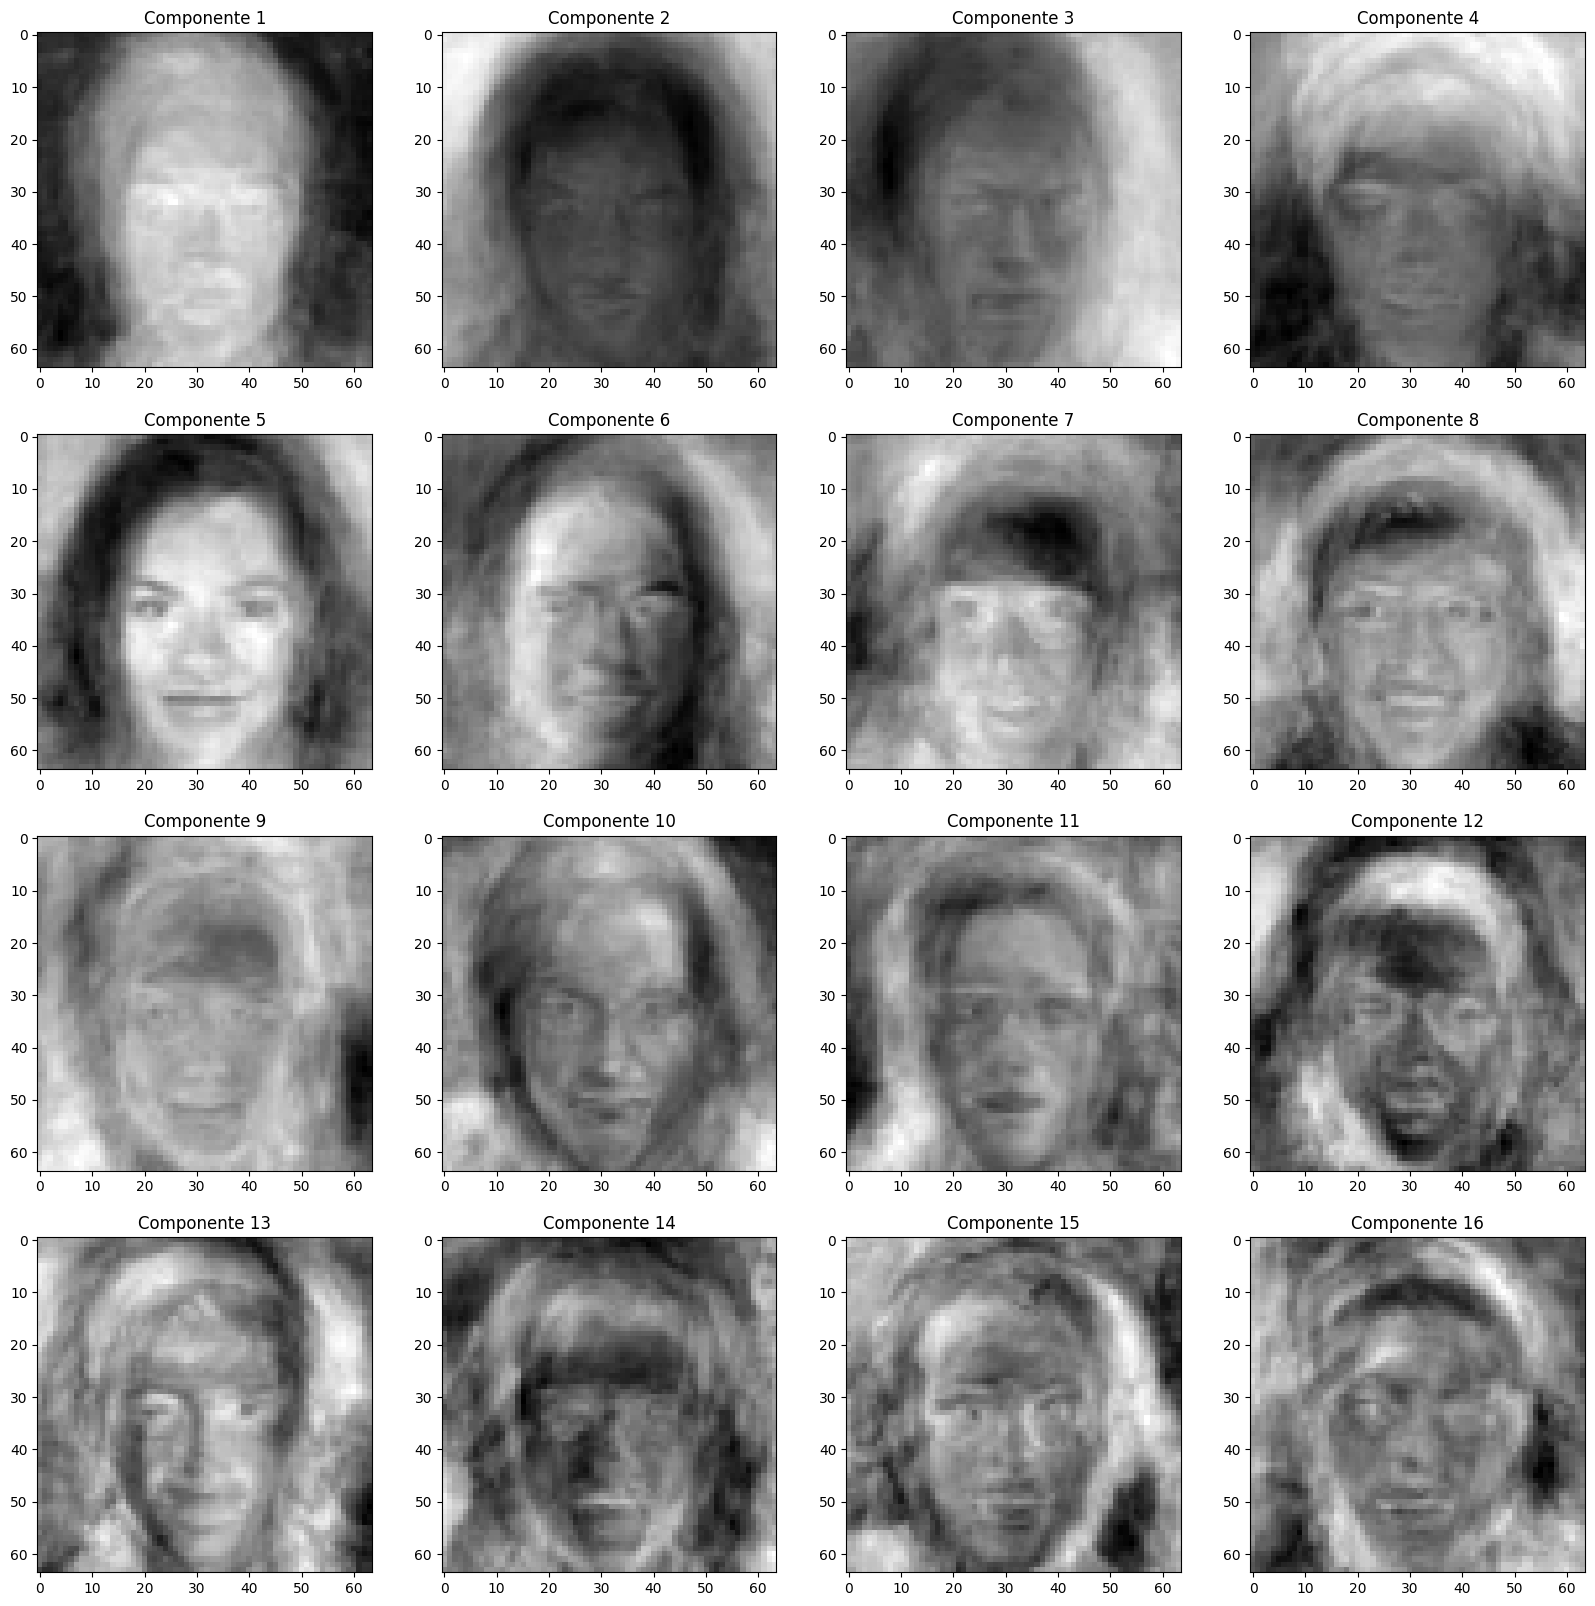

In [25]:
fig, ax = plt.subplots(4,4, figsize = (20,20))

for i in range(4):

    for j in range(4):

        ax[i][j].imshow(eigenvectors[:,i*4+j].reshape(height, width), cmap='gray')
        ax[i][j].set_title(f'Componente {i*4+j+1}')

In [27]:
def perform_PCA(X, eigenvecs, k):

    V = eigenvecs[:,:k]
    Xred = X @ V

    return Xred

Xred2 = perform_PCA(X, eigenvectors,2)
print(f'Xred2 shape: {Xred2.shape}')

Xred2 shape: (97, 2)


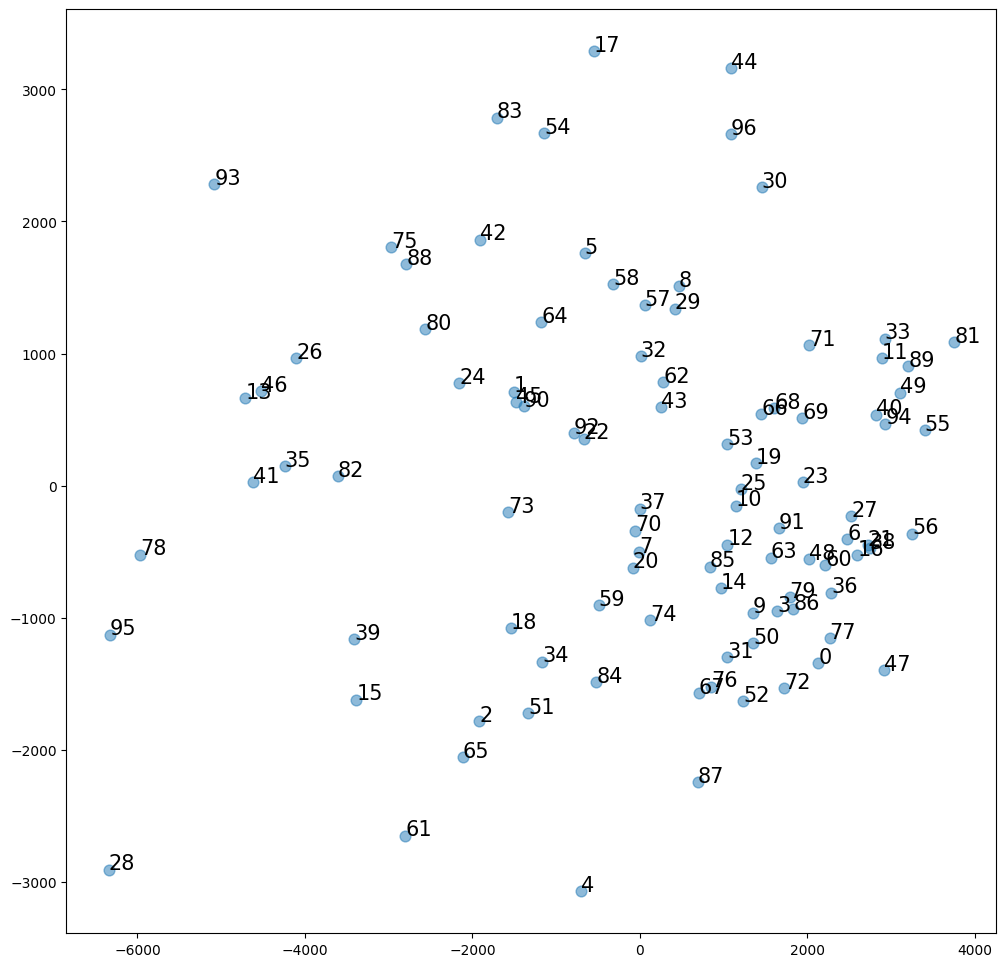

In [28]:
utils.plot_reduced_data(Xred2)

Text(0.5, 1.0, 'Imagem 69')

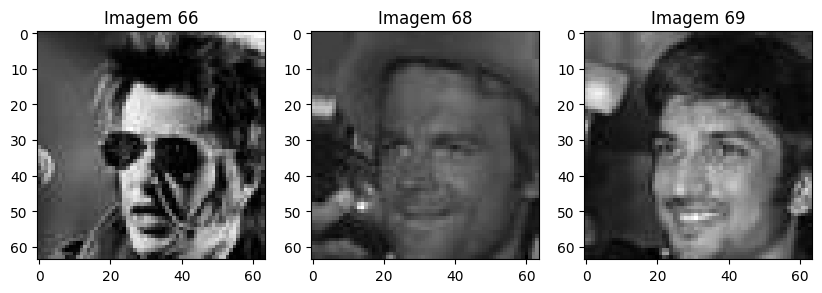

In [31]:
fig, ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(imgs_row[66].reshape(height, width), cmap='gray')
ax[0].set_title('Imagem 66')

ax[1].imshow(imgs_row[68].reshape(height, width), cmap='gray')
ax[1].set_title('Imagem 68')

ax[2].imshow(imgs_row[69].reshape(height, width), cmap='gray')
ax[2].set_title('Imagem 69')

Text(0.5, 1.0, 'Imagem 4')

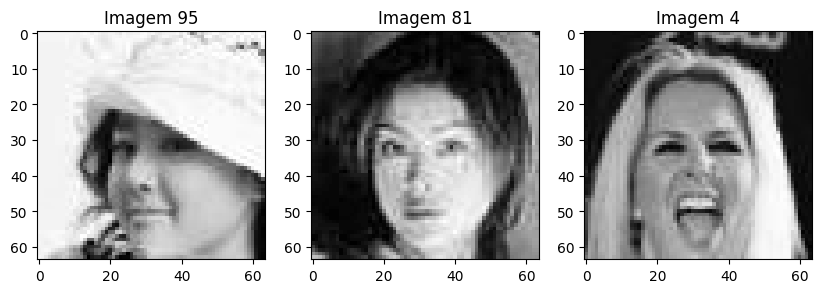

In [33]:
fig, ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(imgs_row[95].reshape(height, width), cmap='gray')
ax[0].set_title('Imagem 95')

ax[1].imshow(imgs_row[81].reshape(height, width), cmap='gray')
ax[1].set_title('Imagem 81')

ax[2].imshow(imgs_row[4].reshape(height, width), cmap='gray')
ax[2].set_title('Imagem 4')